In [1]:
"""
Name: fd_MC.ipynb
Authors: Stephan Meighen-Berger, Martina Karl
Example for the MC method runs
"""

'\nName: fd_MC.ipynb\nAuthors: Stephan Meighen-Berger, Martina Karl\nExample for the MC method runs\n'

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import tqdm

In [3]:
# Latex text rendering
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [4]:
# Adding path to module
sys.path.append("../core/")

In [5]:
# picture path
PICS = '../pics/'

In [6]:
# Module imports
from fourth_day import FD
from fd_config import config

In [7]:
# Creating a fourth_day object
fd = FD()

INFO: ---------------------------------------------------
INFO: ---------------------------------------------------
INFO: Welcome to FD!
INFO: This package will help you model deep sea bioluminescence! (And some other things)
INFO: ---------------------------------------------------
INFO: ---------------------------------------------------
INFO: Creating life...
INFO: Loading phyla according to config
INFO: Data extracted from Latz, M.I., Frank, T.M. & Case, J.F., Marine Biology 98 (1988)
INFO: Loading and parsing Cnidaria_Scyphomedusae.txt
INFO: Loading and parsing Cnidaria_Hydrozoa.txt
INFO: Loading and parsing Cnidaria_Hydrozoa_Hydroidolina_Siphonophores_Calycophorae.txt
INFO: Loading and parsing Cnidaria_Hydrozoa_Hydroidolina_Siphonophores_Physonectae.txt
INFO: Loading and parsing Proteobacteria_Gammaproteobacteria.txt
INFO: Creation finished
INFO: ---------------------------------------------------
INFO: ---------------------------------------------------
INFO: Initializing flood


In [8]:
# Launching solver
fd.sim()

INFO: ---------------------------------------------------
INFO: ---------------------------------------------------
INFO: Calculating light yields
../core\fd_roll_dice.py:289: RuntimeWarning: invalid value encountered in double_scalars
  (np.linalg.norm(new_vec) * np.linalg.norm(current_vec))
INFO: Finished calculation
INFO: Get the results by typing self.results
INFO: Structure of dictionray:
INFO: ["t", "total", "encounter", "shear", "history"]
INFO: ---------------------------------------------------
INFO: ---------------------------------------------------


In [9]:
# Plotting standards
std_size = 10.
fontsize = 20.
lw=3.
h_length=1.5

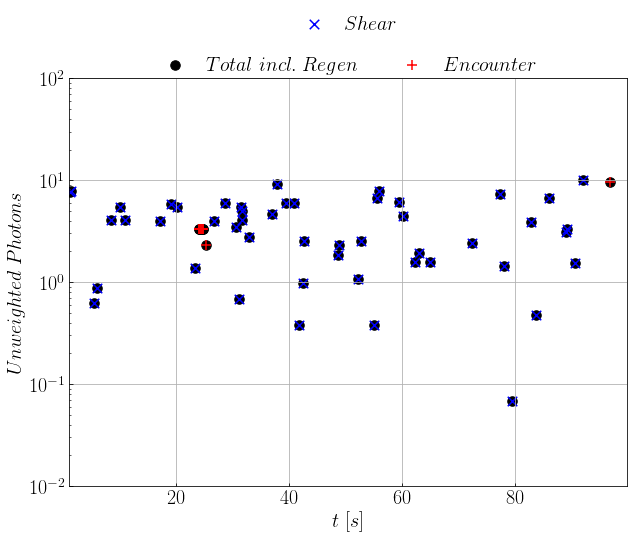

In [12]:
# Energy distributions
figure, ax = plt.subplots(figsize=(std_size, std_size * 6. / 8.))
ax.scatter(fd.results['t'], fd.results['total'], s=lw*30, color='k', label=r'$Total$ $incl.$ $Regen$')
ax.scatter(fd.results['t'], fd.results['encounter'], s=lw*30, color='r', label=r'$Encounter$', marker="+")
ax.scatter(fd.results['t'], fd.results['shear'], s=lw*30, color='b', label=r'$Shear$', marker="x")
ax.set_xlim(1e0, max(fd.results['t']))
ax.set_ylim(1e-2, 1e2)
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_xlabel(r'$t\;[s]$', fontsize=fontsize)
ax.set_ylabel(r'$Unweighted\;Photons$', fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
plt.grid(True)
h, l = ax.get_legend_handles_labels()
lgd1 = ax.legend(h[:2],l[:2], loc=9, bbox_to_anchor=(0.5, +1.1),
                 ncol=2, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
lgd2 = ax.legend(h[2:],l[2:], loc=9, bbox_to_anchor=(0.5, +1.2),
                 ncol=2, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax.add_artist(lgd1)
plt.show()

In [14]:
figure.savefig(PICS + "MC_Example.png",
               bbox_inches='tight')